# **Anies Baswedan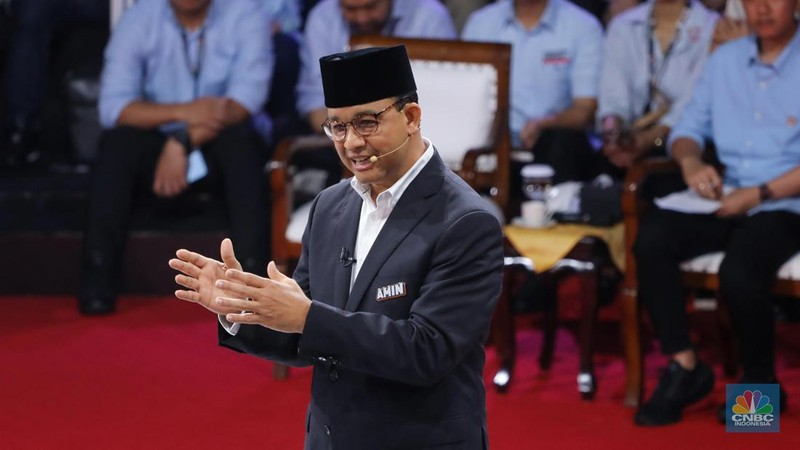**

Proyek ini bertujuan untuk melakukan analisis sentimen terhadap debat Calon Presiden Indonesia 2024, fokus pada Anies Baswedan, melalui persepsi masyarakat yang tercermin dalam platform Twitter. Data untuk analisis diperoleh melalui proses crawling pada Twitter, dengan rentang tanggal 12 Desember 2023 hingga 22 Desember 2023.

Metode yang digunakan dalam proyek ini mencakup pengumpulan data melalui crawling, pengolahan teks untuk mengekstrak informasi relevan, dan analisis sentimen untuk menilai respons masyarakat terhadap kinerja dan pandangan Ganjar Pranowo dalam debat. Tujuan utama dari analisis sentimen ini adalah untuk memahami sejauh mana tanggapan positif, negatif, atau netral dari masyarakat terhadap berbagai aspek debat yang melibatkan Calon Presiden tersebut.


## ***IMPORT LIBRARY***

Proyek ini merupakan implementasi analisis data menggunakan Python, dengan pemanfaatan beberapa pustaka kunci seperti Pandas, re, Seaborn, dan Matplotlib.

*   Pandas
*   re
*   Seaborn
*   Matplotlib

Dengan memanfaatkan Pandas, proyek ini memungkinkan pengguna untuk melakukan manipulasi data yang efisien, termasuk pemfilteran dan pengelompokan data. Selain itu, modul re digunakan untuk melakukan operasi pencarian dan pemfilteran berbasis pola pada data.

Seaborn dan Matplotlib digunakan untuk merancang visualisasi data yang menarik dan informatif. Seaborn memberikan antarmuka yang mudah digunakan untuk menghasilkan plot statistik yang elegan, sementara Matplotlib memberikan fleksibilitas lebih lanjut dalam desain dan penyesuaian grafik

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

## ***Mounting Google Drive***

Mounting Google Drive menghubungkan Google Colab dengan Google Drive pengguna, sehingga memungkinkan akses mudah ke berkas dan dataset yang tersimpan di Drive.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Membaca Dataset**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/anies.csv')  #Membaca Dataset yang sudah di upload dalam Google Drive
df.head() #Menampilkan 5 baris pertama

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,0,Fri Dec 15 04:04:44 +0000 2023,1.735511e+18,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",0.0,0,0.0,0.0,in,797761417894051840,1.735147e+18,MarahIchsan,https://twitter.com/MarahIchsan/status/1735511...
1,1,Fri Dec 15 04:04:33 +0000 2023,1.735511e+18,Suasana pedesaan memang selalu menyenangkan......,0.0,0,0.0,0.0,in,936445409605459968,1.735511e+18,Agung_wiyo,https://twitter.com/Agung_wiyo/status/17355111...
2,2,Fri Dec 15 04:04:31 +0000 2023,1.735511e+18,Program anies hanyalah mengubah nama rumah sak...,0.0,0,0.0,0.0,in,768652236,1.735511e+18,Alfakton_i,https://twitter.com/Alfakton_i/status/17355111...
3,3,Fri Dec 15 04:04:27 +0000 2023,1.735511e+18,@kumparan @aniesbaswedan anies... BERBOHONG DA...,0.0,0,0.0,0.0,in,1710823909275410432,1.735146e+18,justtheway333,https://twitter.com/justtheway333/status/17355...
4,4,Fri Dec 15 04:04:26 +0000 2023,1.735511e+18,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,0.0,0,1.0,1.0,in,1661757337554784264,1.735511e+18,singgihabdrchmn,https://twitter.com/singgihabdrchmn/status/173...


In [5]:
df = df[['full_text','username','created_at']] #mengambil 3 atribut/kolom
df #Menyimpan kembali dalam DataFrame

,full_text,username,created_at
0,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,Suasana pedesaan memang selalu menyenangkan......,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,Program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,@kumparan @aniesbaswedan anies... BERBOHONG DA...,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
245,@apostiera kayaknya pak Anies mngkin akan hadi...,abdigama,Fri Dec 15 03:51:49 +0000 2023
246,@Hasbil_Lbs Siap.... Tapi dulu 2019 skrg ada y...,Abu_Nafstami,Fri Dec 15 03:51:48 +0000 2023
247,PREDIKSI TOGEL CHINA POOLS – 15 DESEMBER 2023 ...,yupitoto,Fri Dec 15 03:51:46 +0000 2023
248,@IrawanRommi @g1taman @ajengcute16__ @99propag...,Campaga591260,Fri Dec 15 03:51:45 +0000 2023


## ***Cleaning Data***

In [6]:
df.shape #Menampilkan Dimensi Data Frame

(250, 3)

### *Menghapus Nilai Duplkat*

In [7]:
df = df.drop_duplicates(subset=['full_text']) #Menghapus nilai duplikat dalam kolom 'full_text'

In [8]:
df.duplicated().sum() #menghitung nilai duplikat

0

### *Menghapus Nilai NaN/Hilang*

In [9]:
df = df.dropna() #Menghapus nilai NaN/hilang

In [10]:
df.isnull().sum() #Menghitung nilai Nan/hilang

full_text     0
username      0
created_at    0
dtype: int64

In [11]:
df.shape #dimensi data setelah melakukan Cleaning Data

(243, 3)

### *Clean Twitter Text*

In [12]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)  #Menghapus semua mention (username) dari teks tweet.
  text = re.sub(r'#\w+', '', text) #Menghapus semua hashtag dari teks tweet.
  text = re.sub(r'RT[\s]+', '', text) #Menghapus istilah "RT" yang menandakan retweet.
  text = re.sub(r'https?://\S+', '', text) #Menghapus URL dari teks tweet.

  text = re.sub(r'[^A-Za-z0-9 ]', '', text) #Menyaring hanya karakter alfanumerik dari teks tweet.
  text = re.sub(r'\s+', ' ', text).strip() #Menghapus spasi yang berlebihan dan memastikan tidak ada spasi di awal atau akhir teks
  return text

df['clean_twitter_text'] = df['full_text'].apply(clean_twitter_text)
df.head()

,full_text,username,created_at,clean_twitter_text
0,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",MarahIchsan,Fri Dec 15 04:04:44 +0000 2023,Pastilah Prabowo Anies nggak punya prestasi
1,Suasana pedesaan memang selalu menyenangkan......,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023,Suasana pedesaan memang selalu menyenangkan ud...
2,Program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023,Program anies hanyalah mengubah nama rumah sak...
3,@kumparan @aniesbaswedan anies... BERBOHONG DA...,justtheway333,Fri Dec 15 04:04:27 +0000 2023,anies BERBOHONG DAN NIPU TANPA RASA BERSALAH
4,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023,Tidak Bicara Sesuai Fakta Anies Dengan Lantang...


### *Mengubah Lowwercase / huruf kecil*

In [13]:
def lowercase(text):
  text = text.lower()
  return text

df['lowercase'] = df['clean_twitter_text'].apply(lowercase)
df.head()


,full_text,username,created_at,clean_twitter_text,lowercase
0,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",MarahIchsan,Fri Dec 15 04:04:44 +0000 2023,Pastilah Prabowo Anies nggak punya prestasi,pastilah prabowo anies nggak punya prestasi
1,Suasana pedesaan memang selalu menyenangkan......,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023,Suasana pedesaan memang selalu menyenangkan ud...,suasana pedesaan memang selalu menyenangkan ud...
2,Program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023,Program anies hanyalah mengubah nama rumah sak...,program anies hanyalah mengubah nama rumah sak...
3,@kumparan @aniesbaswedan anies... BERBOHONG DA...,justtheway333,Fri Dec 15 04:04:27 +0000 2023,anies BERBOHONG DAN NIPU TANPA RASA BERSALAH,anies berbohong dan nipu tanpa rasa bersalah
4,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023,Tidak Bicara Sesuai Fakta Anies Dengan Lantang...,tidak bicara sesuai fakta anies dengan lantang...


## **Preprocessing**

### *Normalisasi*

Normalisasi adalah proses membuat data atau teks menjadi lebih seragam atau standar. Pada konteks pemrosesan teks seperti yang terlihat pada coding di atas, normalisasi dilakukan untuk menggantikan kata-kata atau frasa-frasa tertentu dengan bentuk standar atau lebih umum. Ini membantu dalam menghilangkan variasi yang tidak perlu dalam teks.

In [14]:
normalization_dict = {
    " anies ": " ",
    " prabowo ": " ",
    " yg ": " yang ",
    "kmrn": "kemarin",
    "sngt": "sangat",
    "tuch": "itu",
    " lu ": " kamu ",
    " gamau ": " tidak mau ",
    " nyalonin ": " mencalonkan ",
    " karenaaa ": " karena ",
    " udh ": " sudah ",
    " ama ": " dengan ",
    " gw ": " saya ",
    " bareng ": " bersama ",
    " gmn ": " bagaimana ",
    " ga ": " tidak ",
    " yaa ": " ya ",
    " yg ": " yang ",
    " jg ": " juga ",
    " udah ": " sudah ",
    " gt ": " begitu ",
}

def normalisasi(str_text):
  for i in normalization_dict:
    str_text = str_text.replace(i, normalization_dict[i])
  return str_text

df['normalisasi'] = df['lowercase'].apply(lambda x: normalisasi(x))
df.head()

,full_text,username,created_at,clean_twitter_text,lowercase,normalisasi
0,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",MarahIchsan,Fri Dec 15 04:04:44 +0000 2023,Pastilah Prabowo Anies nggak punya prestasi,pastilah prabowo anies nggak punya prestasi,pastilah nggak punya prestasi
1,Suasana pedesaan memang selalu menyenangkan......,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023,Suasana pedesaan memang selalu menyenangkan ud...,suasana pedesaan memang selalu menyenangkan ud...,suasana pedesaan memang selalu menyenangkan ud...
2,Program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023,Program anies hanyalah mengubah nama rumah sak...,program anies hanyalah mengubah nama rumah sak...,program hanyalah mengubah nama rumah sakit se ...
3,@kumparan @aniesbaswedan anies... BERBOHONG DA...,justtheway333,Fri Dec 15 04:04:27 +0000 2023,anies BERBOHONG DAN NIPU TANPA RASA BERSALAH,anies berbohong dan nipu tanpa rasa bersalah,anies berbohong dan nipu tanpa rasa bersalah
4,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023,Tidak Bicara Sesuai Fakta Anies Dengan Lantang...,tidak bicara sesuai fakta anies dengan lantang...,tidak bicara sesuai fakta dengan lantang sebut...


Jadi, secara keseluruhan, fungsi normalisasi dan kamus normalization_dict digunakan untuk menggantikan kata-kata atau frasa-frasa tertentu dengan bentuk yang telah ditentukan, sehingga membuat teks menjadi lebih seragam dan lebih mudah diolah.

### Install Sastrawi


Sastrawi adalah sebuah library untuk pemrosesan bahasa alami (Natural Language Processing atau NLP) dalam bahasa Indonesia. Fungsinya adalah untuk membantu dalam melakukan beberapa tugas pemrosesan teks, seperti menghilangkan kata-kata umum (stop words) dan stemming (mengembalikan kata ke bentuk dasarnya).

In [15]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.8 MB/s eta 0:00:00


### *StopWords*

In [16]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

# Mendapatkan daftar stop words dari Sastrawi
existing_stop_words = StopWordRemoverFactory().get_stop_words()

# Menambahkan stop words tambahan sesuai dengan kebutuhan
additional_stop_words = [
    'anda', 'bisa', 'dalam', 'dan', 'dapat',
    'dengan', 'di', 'jadi', 'ke', 'masih',
    'menjadi', 'nya', 'oleh', 'pada', 'saja',
    'sebagai', 'sebuah', 'semua', 'seperti',
    'serta', 'sukses', 'telah', 'terhadap',
    'terima', 'tersebut', 'untuk', 'yang',
    'ada', 'adalah', 'akan', 'sehingga',
    'sampai', 'tetapi', 'sejak', 'keluarga']


# Menggabungkan daftar stop words dari Sastrawi dengan stop words tambahan
combined_stop_words = existing_stop_words + additional_stop_words

# Membuat objek ArrayDictionary dari daftar stop words yang sudah diperbarui
new_array = ArrayDictionary(combined_stop_words)

# Membuat objek StopWordRemover dengan menggunakan ArrayDictionary yang baru
stop_word_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    # Menghapus stop words dari teks
    str_text = stop_word_remover_new.remove(str_text)
    return str_text

# Menerapkan fungsi stopword pada kolom 'normalisasi' DataFrame
df['full_text'] = df['normalisasi'].apply(lambda x: stopword(x))

# Menampilkan lima baris pertama dari DataFrame yang sudah diupdate
df.head()


,full_text,username,created_at,clean_twitter_text,lowercase,normalisasi
0,pastilah punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023,Pastilah Prabowo Anies nggak punya prestasi,pastilah prabowo anies nggak punya prestasi,pastilah nggak punya prestasi
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023,Suasana pedesaan memang selalu menyenangkan ud...,suasana pedesaan memang selalu menyenangkan ud...,suasana pedesaan memang selalu menyenangkan ud...
2,program hanyalah mengubah nama rumah sakit se ...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023,Program anies hanyalah mengubah nama rumah sak...,program anies hanyalah mengubah nama rumah sak...,program hanyalah mengubah nama rumah sakit se ...
3,anies berbohong nipu rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023,anies BERBOHONG DAN NIPU TANPA RASA BERSALAH,anies berbohong dan nipu tanpa rasa bersalah,anies berbohong dan nipu tanpa rasa bersalah
4,bicara sesuai fakta lantang sebut lampung memp...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023,Tidak Bicara Sesuai Fakta Anies Dengan Lantang...,tidak bicara sesuai fakta anies dengan lantang...,tidak bicara sesuai fakta dengan lantang sebut...


### *Tokenize*

Tokenization adalah proses memecah teks menjadi bagian-bagian yang lebih kecil yang disebut token. Token dapat berupa kata, frasa, atau bagian-bagian lain dari teks yang memiliki makna. Proses tokenization adalah langkah awal dalam pemrosesan teks, dan setiap unit kecil yang dihasilkan oleh tokenization disebut sebagai token.

In [17]:
## Tokenization: Memecah teks menjadi token
tokenized = df['full_text'].apply(lambda x: x.split())
tokenized

0                            [pastilah, punya, prestasi]
1      [suasana, pedesaan, memang, selalu, menyenangk...
2      [program, hanyalah, mengubah, nama, rumah, sak...
3               [anies, berbohong, nipu, rasa, bersalah]
4      [bicara, sesuai, fakta, lantang, sebut, lampun...
                             ...                        
245    [kayaknya, pak, mngkin, hadir, bakalan, muncul...
246    [siap, dulu, 2019, skrg, yang, lbh, hebat, pa,...
247    [prediksi, togel, china, pools, 15, desember, ...
248    [kasihan, ya, pak, pernah, bilang, takut, tida...
249    [atas, dasar, skill, beliau, sulit, ditandingi...
Name: full_text, Length: 243, dtype: object

Contoh hasil output yang Anda berikan menunjukkan bahwa setiap baris di DataFrame tersebut sekarang berisi daftar token yang terpisah untuk setiap kata dalam teks. Misalnya, baris pertama menunjukkan daftar token untuk teks pertama, baris kedua untuk teks kedua, dan seterusnya. Setiap kata dalam teks dipecah menjadi satu elemen dalam daftar token.

### *Steming*


Stemming adalah proses dalam pemrosesan bahasa alami yang bertujuan untuk mengembalikan kata-kata ke bentuk dasarnya atau kata dasar. Tujuan utama dari stemming adalah untuk mengurangi kata-kata ke akar kata atau bentuk dasarnya sehingga kata-kata yang memiliki akar kata yang sama akan diperlakukan seragam.

In [18]:
# Import library Sastrawi dan modul StemmerFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Fungsi untuk proses stemming pada teks
def stemming(text_cleaning):
  # Membuat objek StemmerFactory
  factory = StemmerFactory()
  # Membuat objek stemmer menggunakan StemmerFactory
  stemmer = factory.create_stemmer()

  # Inisialisasi list untuk menampung hasil stemming
  do = []

  # Looping untuk melakukan stemming pada setiap token
  for w in text_cleaning:
    # Melakukan stemming pada kata dan menambahkannya ke list 'do'
    dt = stemmer.stem(w)
    do.append(dt)

  # Menggabungkan hasil stemming menjadi satu string
  d_clean = " ".join(do)

  # Menampilkan hasil stemming
  print(d_clean)

  # Mengembalikan teks yang telah di-stemming
  return d_clean

# Mengaplikasikan fungsi stemming pada setiap baris teks dalam DataFrame 'tokenized'
tokenized = tokenized.apply(stemming)


pasti punya prestasi
suasana desa memang selalu senang udara segar rimbun tumbuh hijau sungai jernih penuh ikanikan kecil besar tarik angin dieng gaco adidas semalem bukan ordal anies
program hanya ubah nama rumah sakit se indonesia wkwk jungkook is coming olivia gaco daesang bangtan debut karina wonbin batter up 100m views
anies bohong nipu rasa salah
bicara sesuai fakta lantang sebut lampung punya alat pantau polusi udara gaco gempa daesang pagi batter up 100m views pilih baik
prabowo sindir baswedan apbd paling besar kok mas gagal pimpin jakarta gaco gempa daesang pagi batter up 100m views pilih baik
alesan jelas pak jelas jelas jelas nyamasih engga pahamdungu arti
wow mantap sekali ini arti bro jadi presiden ri
dulu ajar majas kelas 8 smpsaya paham apa bilang pak kalo tidak paham mungkin kenyam kelas 8
kasi kiki padahal fakta memang si jago kata kata demi tarik simpati padahal implementasi jamin nol cth waktu jd tri gubernur aja kerja standar banget
anak cakep bener anak capres muk

Proses stemming membantu mengurangi variasi kata ke dalam bentuk dasarnya, sehingga mempermudah analisis teks dan memastikan kata-kata yang memiliki akar kata yang sama diperlakukan seragam.

In [19]:
# Menyimpan DataFrame 'tokenized' ke dalam file CSV
tokenized.to_csv("/content/drive/MyDrive/DATASET/hasilanies.csv", index=False)

# Membaca data dari file CSV yang disimpan sebelumnya
data = pd.read_csv("/content/drive/MyDrive/DATASET/hasilanies.csv", encoding='latin1')


Setelah eksekusi kode ini, data yang telah diolah dan di-stemming dalam DataFrame tokenized akan tersimpan sebagai file CSV dengan nama "hasilganjar.csv" dan dapat diakses kembali menggunakan DataFrame data

### *Translate*

In [20]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 989.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=5c4f5e37c127da6cda64e454ec9b16cb45868a85b367b8375f8d4de88af098b2
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling

In [21]:
import pandas as pd
from googletrans import Translator
data = pd.read_csv("/content/drive/MyDrive/DATASET/hasilanies.csv", encoding='latin1')
data.head()

,full_text
0,pasti punya prestasi
1,suasana desa memang selalu senang udara segar ...
2,program hanya ubah nama rumah sakit se indones...
3,anies bohong nipu rasa salah
4,bicara sesuai fakta lantang sebut lampung puny...


In [22]:
import pandas as pd
from googletrans import Translator

# Fungsi untuk terjemahan
def convert_eng(tweet):
    try:
        translator = Translator()
        translation = translator.translate(tweet, src='id', dest='en')
        return translation.text
    except Exception as e:
        print(f"Error translating: {e}")
        return None

# Menerapkan fungsi terjemahan pada kolom 'full_text'
data["tweet_english"] = data['full_text'].apply(convert_eng)

# Menyimpan DataFrame yang sudah diupdate ke dalam file CSV
data.to_csv("/content/drive/MyDrive/DATASET/tweetenglishaniess.csv", index=False)


Menerjemahkan teks ke bahasa Inggris sebelum melakukan analisis sentimen memiliki beberapa manfaat utama:

1. **Konsistensi Bahasa:**
   - Menerjemahkan ke bahasa Inggris menjaga konsistensi dalam analisis sentimen di seluruh dataset, memastikan keseragaman dalam penggunaan model.

2. **Ketersediaan Model Sentimen:**
   - Model sentimen lebih tersedia dan terlatih dengan baik untuk bahasa Inggris, meningkatkan akurasi analisis sentimen.

3. **Perbandingan yang Mudah:**
   - Menerjemahkan ke bahasa Inggris mempermudah perbandingan hasil sentimen dengan literatur dan penelitian lain yang umumnya berfokus pada bahasa Inggris.

4. **Fleksibilitas NLP:**
   - Bahasa Inggris mendukung alat dan teknik pemrosesan bahasa alami (NLP) yang lebih canggih, meningkatkan fleksibilitas dalam analisis.

5. **Kontrol Kualitas Terjemahan:**
   - Terjemahan ke bahasa Inggris dapat diawasi dan dievaluasi untuk memilih layanan terjemahan yang memberikan hasil terbaik untuk konteks tertentu.

### *Labeling*

Labeling dalam konteks analisis sentimen adalah proses menetapkan label atau kategori tertentu (seperti "Positif," "Netral," atau "Negatif") pada setiap teks atau dokumen berdasarkan sentimen atau perasaan yang terkandung di dalamnya. Tujuannya adalah untuk mengkategorikan teks-teks tersebut sesuai dengan polaritas emosionalnya.

In [23]:
data = pd.read_csv("/content/drive/MyDrive/DATASET/tweetenglishanies.csv", index_col=0)
data

,full_text,tweet_english
0,pasti anies punya prestasi,surely prabowo anies has achievements
1,main aman gimana jauh pikir awam saya jelas ba...,playing it safe how far do you think the publi...
2,ayoviralkan rekam jejak anies rasyid baswedan ...,ayoviralkan track record anies rasyid baswedan...
3,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...
4,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...
...,...,...
238,anies sosok capres tidak milik adab orang lebi...,anies figure of the presidential candidate doe...
239,kalau dibaca2 baik tetep putus tangan presiden...,"if it is read well, it still breaks the presid..."
240,macam serang anies lalu anies nampol balik woiii,like attack prabowo anies then anies nampol ba...
241,andai partai gabung anies kicau seperti juga s...,if the party joined the chirping anies as well...


In [24]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [25]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append('Netral')
  else :
    total_negatif += 1
    status.append('Negatif')

  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data :{total}')

Hasil Analisis Data:
Positif = 119
Netral = 76
Negatif = 48

Total Data :243


TextBlob adalah alat pemrosesan bahasa alami (NLP) yang menyediakan analisis sentimen dengan memberikan nilai polaritas pada setiap teks. Nilai polaritas ini mengindikasikan sejauh mana teks tersebut bersifat positif, netral, atau negatif.


In [27]:
data['klasifikasi'] = status
data

,full_text,tweet_english,klasifikasi
0,pasti anies punya prestasi,surely prabowo anies has achievements,Positif
1,main aman gimana jauh pikir awam saya jelas ba...,playing it safe how far do you think the publi...,Positif
2,ayoviralkan rekam jejak anies rasyid baswedan ...,ayoviralkan track record anies rasyid baswedan...,Netral
3,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif
4,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral
...,...,...,...
238,anies sosok capres tidak milik adab orang lebi...,anies figure of the presidential candidate doe...,Positif
239,kalau dibaca2 baik tetep putus tangan presiden...,"if it is read well, it still breaks the presid...",Netral
240,macam serang anies lalu anies nampol balik woiii,like attack prabowo anies then anies nampol ba...,Netral
241,andai partai gabung anies kicau seperti juga s...,if the party joined the chirping anies as well...,Netral


Pendekatan ini memberikan pemahaman umum mengenai sentimen setiap teks berdasarkan nilai polaritasnya. Namun, metode ini bersifat sederhana dan mungkin kurang akurat untuk tugas yang memerlukan analisis sentimen yang lebih mendalam atau spesifik.

### Wordcloud

Word cloud adalah representasi visual dari sekumpulan kata-kata yang diatur secara acak, di mana frekuensi munculnya setiap kata diwakili oleh ukuran dan kecerahan warna kata tersebut. Kata-kata yang lebih sering muncul akan memiliki ukuran yang lebih besar dan warna yang lebih terang, sementara kata-kata yang jarang muncul akan lebih kecil dan lebih pucat.

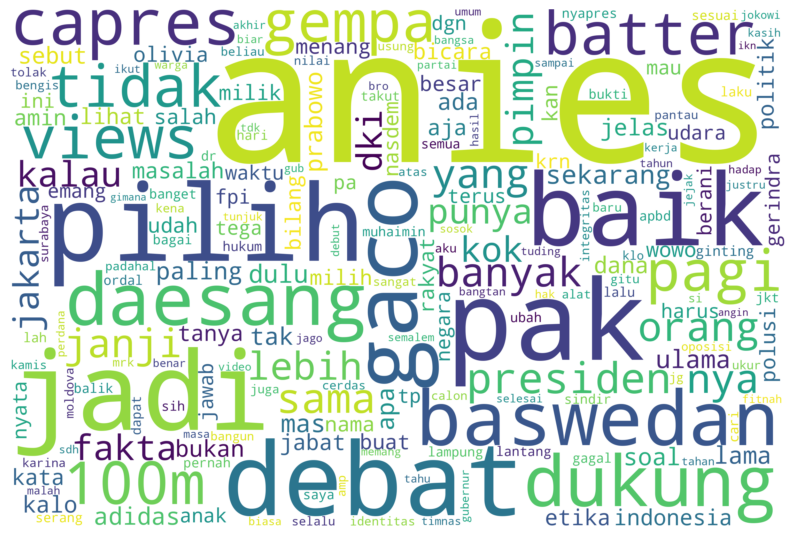

In [28]:
# Import modul WordCloud dan STOPWORDS dari pustaka wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan Word Cloud
def plot_cloud(wordcloud):
    """
    Menampilkan Word Cloud dengan ukuran gambar 10x8 inci.

    Parameters:
    - wordcloud (WordCloud): Objek WordCloud yang akan ditampilkan.
    """
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Menggabungkan semua teks dari kolom 'full_text' dalam DataFrame data menjadi satu string
all_words = ' '.join([tweets for tweets in data['full_text']])

# Membuat objek WordCloud dengan konfigurasi tertentu
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='white',  # Mengubah warna latar belakang menjadi putih
    colormap='viridis',  # Mengganti warna dengan 'viridis'
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

# Menampilkan Word Cloud menggunakan fungsi plot_cloud
plot_cloud(wordcloud)


In [29]:
print(data.columns)


Index(['full_text', 'tweet_english', 'klasifikasi'], dtype='object')


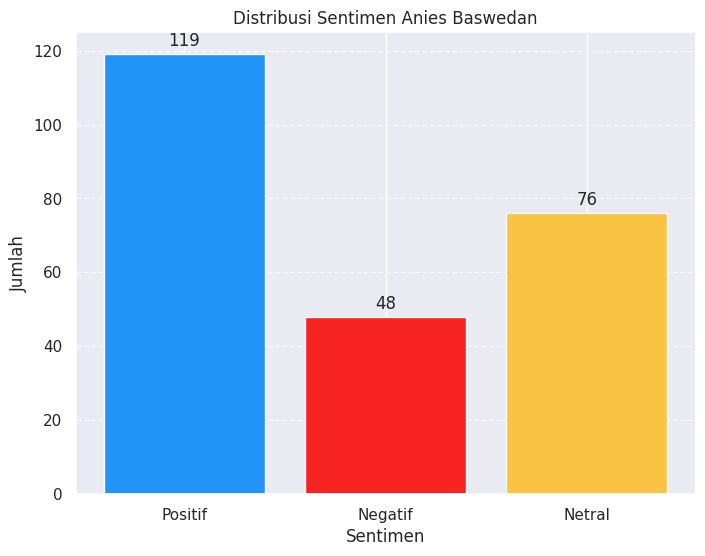

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur tema visualisasi menggunakan Seaborn
sns.set_theme()

# Data untuk membuat diagram batang
labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

# Fungsi untuk menampilkan diagram batang
def show_bar_chart(labels, counts, title):
    # Membuat subplot dengan ukuran tertentu
    fig, ax = plt.subplots(figsize=(8, 6))

    # Membuat diagram batang dengan warna tertentu
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    # Menambahkan label jumlah di atas setiap batang
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan garis-garis grid pada sumbu y
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Menetapkan label sumbu x dan y serta judul diagram
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    # Menampilkan diagram batang
    plt.show()

# Memanggil fungsi untuk menampilkan diagram batang
show_bar_chart(labels, counts, "Distribusi Sentimen Anies Baswedan")


### *Klasifikasi Sentimen Naive Bayes Classifier*

Naive Bayes adalah metode klasifikasi statistik yang mengandalkan Teorema Bayes. Dalam konteks analisis sentimen, Naive Bayes mengasumsikan bahwa setiap kata dalam teks adalah fitur yang independen dan berkontribusi terhadap klasifikasi sentimen secara bersamaan. Meskipun asumsi ini sederhana (naive), Naive Bayes sering memberikan hasil yang baik dalam klasifikasi teks

In [31]:
data

,full_text,tweet_english,klasifikasi
0,pasti anies punya prestasi,surely prabowo anies has achievements,Positif
1,main aman gimana jauh pikir awam saya jelas ba...,playing it safe how far do you think the publi...,Positif
2,ayoviralkan rekam jejak anies rasyid baswedan ...,ayoviralkan track record anies rasyid baswedan...,Netral
3,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif
4,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral
...,...,...,...
238,anies sosok capres tidak milik adab orang lebi...,anies figure of the presidential candidate doe...,Positif
239,kalau dibaca2 baik tetep putus tangan presiden...,"if it is read well, it still breaks the presid...",Netral
240,macam serang anies lalu anies nampol balik woiii,like attack prabowo anies then anies nampol ba...,Netral
241,andai partai gabung anies kicau seperti juga s...,if the party joined the chirping anies as well...,Netral


In [32]:
# Menghapus kolom 'full_text' dari DataFrame 'data' dan menyimpan hasilnya di 'dataset'
dataset = data.drop(['full_text'], axis=1, inplace=False)

# Mengubah DataFrame menjadi list of tuples
dataset = [tuple(x) for x in dataset.to_records(index=False)]


In [33]:
import random

set_positif = []
set_negatif = []
set_netral = []

# Membagi dataset menjadi set_positif, set_negatif, dan set_netral berdasarkan sentimen
for n in dataset:
  if (n[1] == 'Positif'):
    set_positif.append(n)
  elif(n[1] == 'Negatif'):
    set_negatif.append(n)
  else:
    set_netral.append (n)

# Mengambil sampel acak setengah dari setiap kategori sentimen
set_positif = random.sample(set_positif, k=int(len(set_positif) /2))
set_negatif = random.sample(set_negatif, k=int (len (set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len (set_netral)/2))

# Menggabungkan setiap kategori sentimen menjadi satu dataset pelatihan (train)
train = set_positif + set_negatif + set_netral

# Menyimpan dataset pelatihan ke dalam list train_set
train_set = []

# Menggabungkan setengah dari setiap kategori sentimen menjadi satu set data pelatihan (train_set)
for n in train:
  train_set.append(n)

In [34]:
# Membuat dan melatih model klasifikasi Naive Bayes menggunakan TextBlob
from textblob.classifiers import NaiveBayesClassifier

# Membuat dan melatih model klasifikasi Naive Bayes dengan data pelatihan (train_set)
cl = NaiveBayesClassifier(train_set)

# Mengukur akurasi model pada data uji (dataset)
accuracy = cl.accuracy(dataset)

# Menampilkan hasil akurasi model pada data uji
print("Akurasi Test : ", accuracy)


Akurasi Test :  0.7654320987654321


Proses NaiveBayesClassifier dalam coding di atas dilakukan dengan langkah-langkah berikut:

1. Menghapus Kolom 'full_text':
  *   Menggunakan metode drop pada DataFrame data untuk menghapuS kolom 'full_text'.
  *   Hasilnya disimpan pada DataFrame baru yang disebut dataset.
2. Mengubah DataFrame Menjadi List of Tuples
  * Mengubah DataFrame dataset menjadi list of tuples menggunakan list comprehension dan to_records(index=False).
  * Setiap tuple merepresentasikan satu baris data.
3. Membagi Dataset Menjadi Kategori Sentimen:
  * Membuat tiga set terpisah (set_positif, set_negatif, dan set_netral) berdasarkan kategori sentimen ('Positif', 'Negatif', 'Netral').
4. Mengambil Sampel Acak Setengah dari Setiap Kategori Sentimen:
  * Menggunakan fungsi random.sample untuk mengambil sampel acak setengah dari setiap kategori sentimen.
  * Hasilnya disimpan pada variabel set_positif, set_negatif, dan set_netral.
5. Menggabungkan Setiap Kategori Sentimen Menjadi Satu Dataset Pelatihan (Train):
  * Menggabungkan setengah dari setiap kategori sentimen menjadi satu dataset pelatihan (train) menggunakan operasi penggabungan list (+).
6. Menyimpan Dataset Pelatihan ke dalam List train_set:
  * Membuat list baru (train_set) dan menggabungkan setiap tuple dari dataset pelatihan (train) ke dalam list tersebut.
7. Pelatihan Model Naive Bayes Classifier:
  * Membuat objek model klasifikasi Naive Bayes menggunakan textblob.classifiers.NaiveBayesClassifier(train_set).
  * Model ini dilatih dengan menggunakan dataset pelatihan (train_set) yang sudah disiapkan sebelumnya.

In [35]:
# Import library
from textblob import TextBlob

# Mengambil teks tweet dalam bahasa Inggris dari DataFrame
data_tweet = list(data['tweet_english'])

# Inisialisasi variabel polaritas
polaritas = 0

# Inisialisasi variabel status dan total sentimen
status = []
total_positif = total_negatif = total_netral = total = 0

# Inisialisasi variabel untuk confusion matrix
y_true = []
y_pred = []

# Iterasi melalui setiap tweet dalam data
for i, tweet in enumerate(data_tweet):
    # Melakukan analisis sentimen dengan menggunakan classifier yang sudah di-train
    analysis = TextBlob(tweet, classifier=cl)

    # Menentukan sentimen aktual dan sentimen prediksi
    true_sentiment = dataset[i][1]
    predicted_sentiment = analysis.classify()

    # Menyimpan sentimen aktual dan sentimen prediksi untuk confusion matrix
    y_true.append(true_sentiment)
    y_pred.append(predicted_sentiment)

    # Menghitung jumlah sentimen positif, netral, dan negatif
    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    # Menyimpan sentimen hasil analisis untuk setiap tweet
    status.append(analysis.classify())

    # Menghitung total tweet yang telah di-analisis
    total += 1

# Menampilkan hasil analisis sentimen
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')


Hasil Analisis Data:
Positif = 140
Netral = 83
Negatif = 20

Total Data: 243



Confusion Matrix:
[[105  14   0]
 [ 15  61   0]
 [ 20   8  20]]

Classification Report:
              precision    recall  f1-score   support

     Negatif       1.00      0.42      0.59        48
      Netral       0.73      0.80      0.77        76
     Positif       0.75      0.88      0.81       119

    accuracy                           0.77       243
   macro avg       0.83      0.70      0.72       243
weighted avg       0.79      0.77      0.75       243



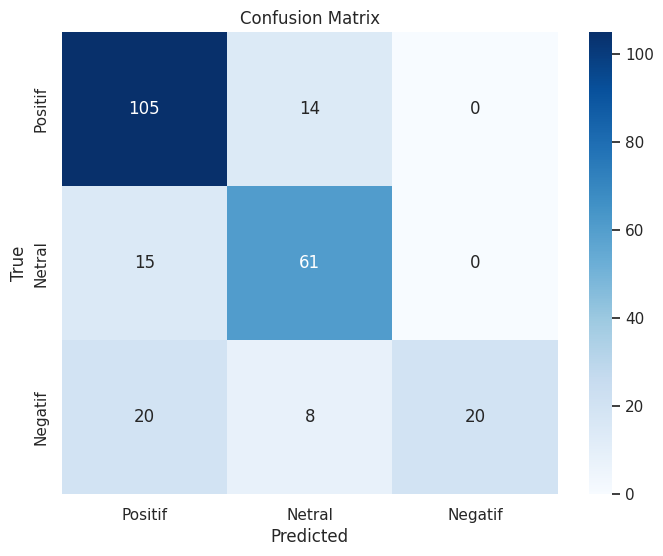

In [36]:
# Import library
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=['Positif', 'Netral', 'Negatif'])

# Menghitung classification report
class_report = classification_report(y_true, y_pred)

# Menampilkan confusion matrix dan classification report
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Positif', 'Netral', 'Negatif'],
            yticklabels=['Positif', 'Netral', 'Negatif'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [37]:
# Membuat DataFrame dari hasil klasifikasi Bayes
status_df = pd.DataFrame({"Klasifikasi Bayes": status})

# Menambahkan kolom 'klasifikasi_bayes' ke dalam DataFrame data
data['klasifikasi_bayes'] = status_df


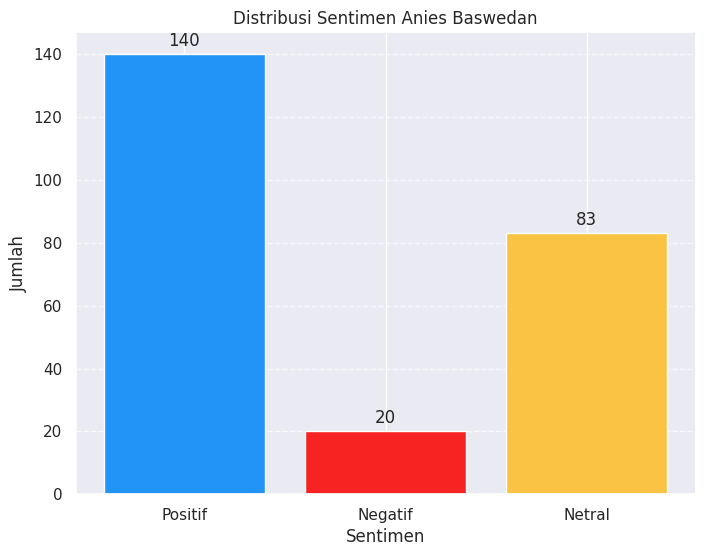

In [38]:
import seaborn as sns

# Setting tema seaborn
sns.set_theme()

# Data untuk plot
labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

# Fungsi untuk menampilkan diagram batang
def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    # Menambahkan label angka di atas batang
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Menambahkan label sumbu x, sumbu y, dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    # Menampilkan plot
    plt.show()

# Menjalankan fungsi untuk menampilkan diagram batang
show_bar_chart(labels, counts, "Distribusi Sentimen Anies Baswedan")


In [39]:
data

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,pasti anies punya prestasi,surely prabowo anies has achievements,Positif,Netral
1,main aman gimana jauh pikir awam saya jelas ba...,playing it safe how far do you think the publi...,Positif,Positif
2,ayoviralkan rekam jejak anies rasyid baswedan ...,ayoviralkan track record anies rasyid baswedan...,Netral,Netral
3,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif,Positif
4,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral,Netral
...,...,...,...,...
238,anies sosok capres tidak milik adab orang lebi...,anies figure of the presidential candidate doe...,Positif,Positif
239,kalau dibaca2 baik tetep putus tangan presiden...,"if it is read well, it still breaks the presid...",Netral,Positif
240,macam serang anies lalu anies nampol balik woiii,like attack prabowo anies then anies nampol ba...,Netral,Netral
241,andai partai gabung anies kicau seperti juga s...,if the party joined the chirping anies as well...,Netral,Positif


In [40]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

# Iterasi melalui setiap elemen tuple dalam data_eval
for n in data_eval:
    # Memeriksa apakah tuple memiliki setidaknya 4 elemen
    if len(n) >= 4:
        # Memeriksa apakah elemen ke-2 dan ke-3 dari tuple tidak sama
        if n[2] != n[3]:
            # Menampilkan informasi teks, klasifikasi, dan klasifikasi Bayes yang berbeda
            print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]}\n')
    else:
        print("Tuple tidak memiliki cukup elemen.")

Text: pasti anies punya prestasi
Classifier: Positif
Classifier Bayes: Netral

Text: hukum tegak semua capres anies singgung gibran papar visi misi soal tega hukum
Classifier: Netral
Classifier Bayes: Positif

Text: ini 13 poin pakta integritas pakat paslon 1 anies baswedan muhaimin iskandar dapat dukung ijtima ulama sepenuh
Classifier: Positif
Classifier Bayes: Netral

Text: kasi mau pilih anies dibully emak
Classifier: Netral
Classifier Bayes: Positif

Text: gerindra bantah soal anies bilang bisnis macet gegara jadi oposisi
Classifier: Netral
Classifier Bayes: Positif

Text: anies musuh negara wakanda harap rakyat indonesia wakanda no more indonesia forever
Classifier: Negatif
Classifier Bayes: Positif

Text: anies ikut kubur harun tahun 2019 berita apakah kata hoax padahal beliau ikut kubur
Classifier: Netral
Classifier Bayes: Positif

Text: anies baswedan jawab tanya debat bukti nyata kerja sangat muas
Classifier: Negatif
Classifier Bayes: Positif

Text: pak pernah usung anies tpi 